## README
Crie uma pasta de dados no diretório 2024, caso você clone este repositório. Alternativamente, você pode criar uma pasta no mesmo diretório deste jupyter notebook com o nome de dados.

## Utilizando o pacote OS

Baixando os dados do site do Leo

In [17]:
# Importando pacote os
import os

In [18]:
import pandas as pd

In [19]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt

In [20]:
#Extraindo o diretório que estamos trabalhando
cwd = os.getcwd()
cwd

#Estabelecendo a pasta de dados que quero utilizar
dataPath = os.path.dirname(cwd) + '\\dados_de_entrada'
print('Diretório de dados:' + dataPath)

Diretório de dados:C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\dados_de_entrada


In [ ]:
# Listar documentos que estão dentro da pasta de dados
# Extraindo o nome dos arquivos dentro da pasta
dataList = os.listdir(dataPath)
print(dataList)

In [27]:
# Extraindo os anos dos dados
# Trabalhando com o nome dos arquivos
years = []
for dl in dataList:
    if os.path.isfile(dataPath+ '\\'+dl):
        years.append(dl.split('_')[-1].split('.')[0])

years = np.unique(years)
print(years)

# Extraindo as estações de dados
stations = []
for dl in dataList:
    stations.append(dl.split('_')[-2])

stations = np.unique(stations)
print(stations)

['2022' '2023']
['SBFL']


In [23]:
# Lendo todos os arquivos da pasta
# Todos os dados devem estar no mesmo formato com as mesmas 
dataAll=[]
for dl in dataList:
    print(dl)
    data = pd.read_csv(dataPath + '\\' + dl)
    dataAll.append(data)

#Concatenando a lista de dados
dataAll = pd.concat(dataAll)
dataAll.head()

metar_SBFL_2022.csv
metar_SBFL_2023.csv


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh
0,1,1,2022,0,NaN,120.0,1.543332,914.4,1.0,1.0,1009.678792,23.0,21.0,NaN,0.0,88.51
1,1,1,2022,1,NaN,280.0,1.028888,NaN,NaN,NaN,1009.685980,20.0,20.0,NaN,0.0,100.00
2,1,1,2022,2,NaN,NaN,0.514444,NaN,NaN,NaN,1009.678792,22.0,21.0,NaN,0.0,94.06
3,1,1,2022,3,NaN,NaN,1.028888,457.2,1.0,1.0,1009.682386,21.0,21.0,NaN,0.0,100.00
4,1,1,2022,4,NaN,NaN,1.028888,NaN,NaN,NaN,1009.685980,22.0,20.0,NaN,0.0,88.43


SBFL
2022
2023


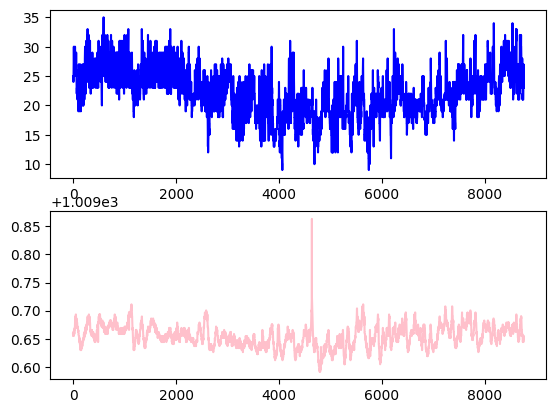

In [40]:
# Condicionando a leitura para apenas uma estação


for st in stations:
    dataAll = []
    print(st)
    for year in years:
        print(year)
        try:
            data = pd.read_csv(dataPath + '\\' + 'metar_' + st + '_' + year + '.csv')
        except:
            print('Não tem a estação ou o ano')

dataAll.append(data)

# Concatenando a lista de dados
dataAll = pd.concat(dataAll)

# Criando uma figura para a estação
fig, ax = plt.subplots(2)
ax[0].plot(dataAll.temp, 'blue')
ax[1].plot(dataAll.p, 'pink')